# Google Hash Code 2022 practice problem solution (One Pizza)

In [107]:
import math
import statistics
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()

In [140]:
df1 = 'a_an_example.in.txt'
df2 = 'b_basic.in.txt'
df3 = 'c_coarse.in.txt'
df4 = 'd_difficult.in.txt'
df5 = 'e_elaborate.in.txt'

with open(df4 , 'r')as myfile:
    filelines = myfile.readlines()
print(len(filelines))
type(filelines)

18737


list

In [141]:
#int(filelines[0].strip())*2

In [142]:
IngredientsLikes = {}
IngredientsDislike = {}
EveryoneLikes = []
EveryoneDisLikes =[]

#print(filelines[0])

for i in range(1,int(filelines[0].strip())*2+1):
    
    LineToList = filelines[i].strip().split(' ')
    
    
    if i%2 != 0:
        EveryoneLikes.append(int(LineToList[0]))
        for j in range(1,len(LineToList)):
            IngredientsLikes[LineToList[j]] = IngredientsLikes.get(LineToList[j],0) +1
            IngredientsDislike[LineToList[j]] = IngredientsDislike.get(LineToList[j],0) +0
            
            
    elif i%2 == 0:
        EveryoneDisLikes.append(int(LineToList[0]))
        for j in range(1,len(LineToList)):
            IngredientsDislike[LineToList[j]] = IngredientsDislike.get(LineToList[j],0) +1
            IngredientsLikes[LineToList[j]] = IngredientsLikes.get(LineToList[j],0) +0

In [143]:
#print(IngredientsLikes)

In [144]:
#print(IngredientsDislike)

In [145]:
#print(EveryoneLikes)

In [146]:
#print(EveryoneDisLikes)

In [147]:
likesmean = statistics.mean(EveryoneLikes)
likesmeadian = statistics.median(EveryoneLikes)
likesmood = statistics.mode(EveryoneLikes)
likevariace = statistics.variance(EveryoneLikes)
likestd = statistics.stdev(EveryoneLikes)
print(f'likesmean    = {likesmean}')
print(f'likesmeadian = {likesmeadian}')
print(f'likesmood    = {likesmood}')
print(f'likevariace  = {likevariace}')
print(f'likestd      = {likestd}')

likesmean    = 1.7838385994876174
likesmeadian = 2.0
likesmood    = 1
likevariace  = 0.8548385997611215
likestd      = 0.924574821072433


In [148]:
Dislikesmean = statistics.mean(EveryoneDisLikes)
Dislikesmeadian = statistics.median(EveryoneDisLikes)
Dislikesmood = statistics.mode(EveryoneDisLikes)
Dislikevariace = statistics.variance(EveryoneDisLikes)
Dislikestd = statistics.stdev(EveryoneDisLikes)
print(f'Dislikesmean    = {Dislikesmean}')
print(f'Dislikesmeadian = {Dislikesmeadian}')
print(f'Dislikesmood    = {Dislikesmood}')
print(f'Dislikevariace  = {Dislikevariace}')
print(f'Dislikestd      = {Dislikestd}')

Dislikesmean    = 1.6305508112724167
Dislikesmeadian = 2.0
Dislikesmood    = 1
Dislikevariace  = 1.2315935046240882
Dislikestd      = 1.1097718254776918


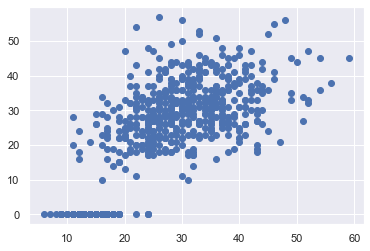

In [149]:
xaxis = list(IngredientsLikes.values())
yaxis = list(IngredientsDislike.values())


plt.scatter(xaxis,yaxis)


plt.show()